In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/drone-strikes-in-pakistan/drone-strikes-dataset.csv")
df.head()

,S#,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,...,Injured Min,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
0,1.0,"Friday, June 18, 2004",2004.0,22:00,Near Wana,South Waziristan,FATA,1.0,NaN,1.0,...,NaN,NaN,N,Blast occured in courtyard of the house of lon...,Village in Wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255
1,2.0,"Sunday, May 08, 2005",2005.0,23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,NaN,...,NaN,NaN,N,Drone struck a car driven by local warlord- ki...,Civilian killied was Samiullah Khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655
2,3.0,"Thursday, December 01, 2005",2005.0,NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,NaN,...,NaN,2.0,NaN,Explosive occurred at a mud house,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,http://edition.cnn.com/2005/WORLD/asiapcf/12/0...,70.1455,32.9746,7.080,44.744
3,4.0,"Friday, January 06, 2006",2006.0,NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963
4,5.0,"Friday, January 13, 2006",2006.0,3:00,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,...,NaN,2.0,Y,Three houses were tarheted in Damadola village...,Masood Khan house was among those bombed. Want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045


In [3]:
df.columns

Index(['S#', 'Date', 'Year', 'Time', 'Location', 'City', 'Province',
       'No of Strikes', 'Al-Qaeda', 'Taliban', 'Civilians Min',
       'Civilians Max', 'Foreigners Min', 'Foreigners Max', 'Total Died Min',
       'Killed', 'Injured Min', 'Injured ', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [4]:
df.isnull().sum()

S#                          1
Date                        1
Year                        1
Time                      231
Location                    2
City                        1
Province                    1
No of Strikes               1
Al-Qaeda                  308
Taliban                   264
Civilians Min              69
Civilians Max              46
Foreigners Min            312
Foreigners Max            265
Total Died Min             97
Killed                      3
Injured Min               260
Injured                   129
Women/Children             69
Special Mention (Site)     75
Comments                  229
References                  7
Longitude                   1
Latitude                    1
Temperature(C)              2
Temperature(F)              2
dtype: int64

In [5]:
df.drop(columns=['Date','Time','Comments','Al-Qaeda','Injured Min','Comments','Temperature(C)','Temperature(F)','References'], inplace=True)
df['Civilians Killed'] = df['Civilians Min'] + df['Civilians Max']
df.drop(columns=['Civilians Min','Civilians Max'], inplace=True)


In [6]:
df.head()

,S#,Year,Location,City,Province,No of Strikes,Taliban,Foreigners Min,Foreigners Max,Total Died Min,Killed,Injured,Women/Children,Special Mention (Site),Longitude,Latitude,Civilians Killed
0,1.0,2004.0,Near Wana,South Waziristan,FATA,1.0,1.0,NaN,NaN,NaN,5.0,NaN,N,Blast occured in courtyard of the house of lon...,69.9000,33.0333,4.0
1,2.0,2005.0,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,NaN,NaN,NaN,NaN,2.0,NaN,N,Drone struck a car driven by local warlord- ki...,70.1455,32.9746,1.0
2,3.0,2005.0,Haisori- Miran Shah,North Waziristan,FATA,1.0,NaN,NaN,3.0,NaN,5.0,2.0,NaN,Explosive occurred at a mud house,70.1455,32.9746,1.0
3,4.0,2006.0,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,70.1455,32.9746,NaN
4,5.0,2006.0,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,NaN,NaN,18.0,2.0,Y,Three houses were tarheted in Damadola village...,71.5000,34.6833,18.0


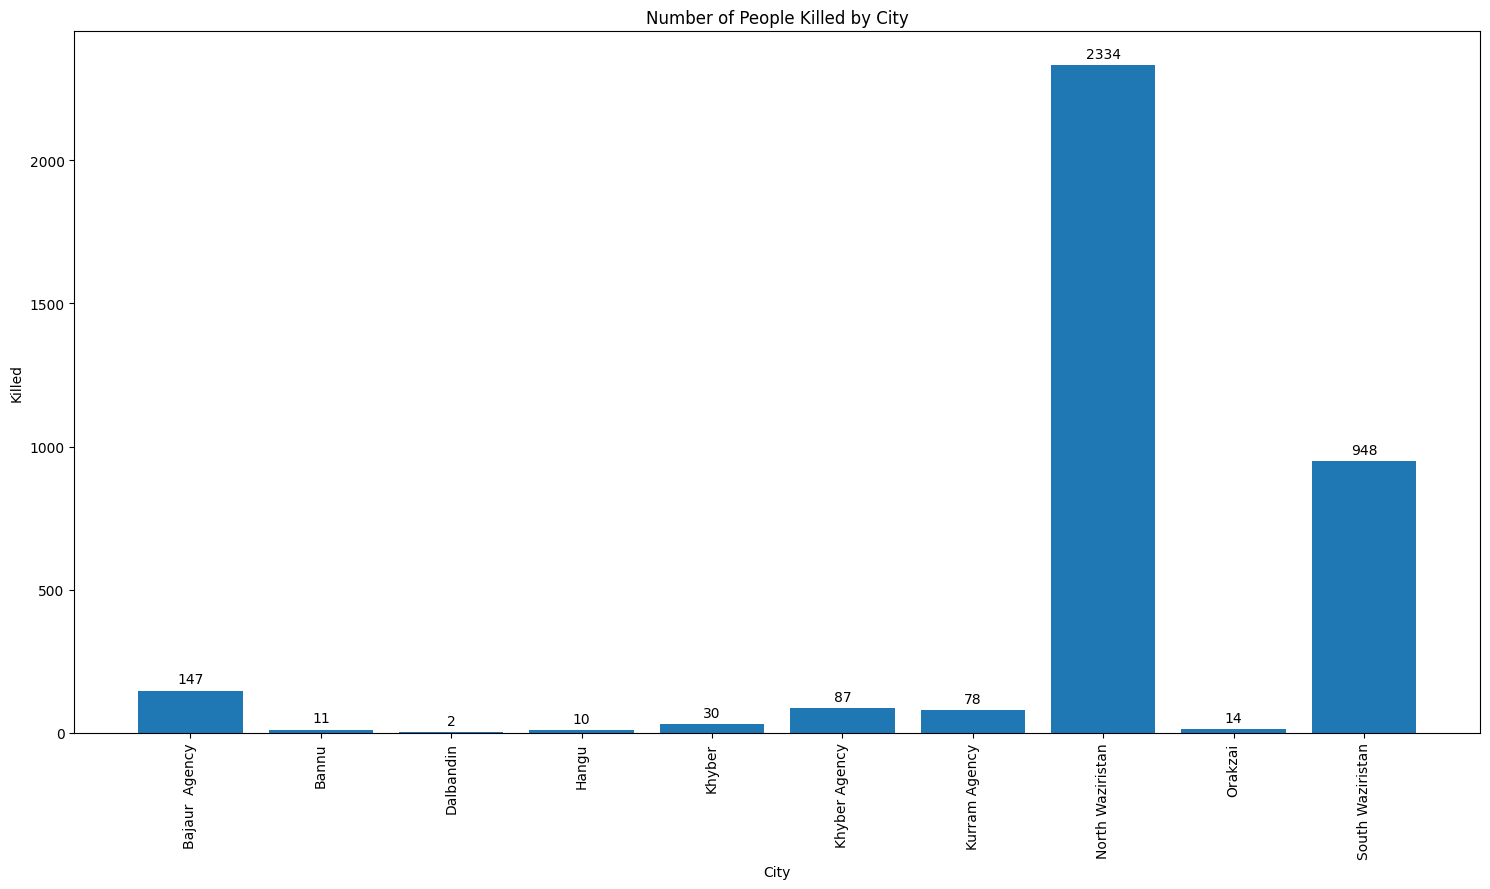

In [7]:
kill = df.groupby('City')['Killed'].sum()

# Create a vertical bar chart
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
bars = plt.bar(kill.index, kill)
plt.xlabel('City')
plt.ylabel('Killed')
plt.title('Number of People Killed by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',  # Format the number of killed as an integer
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                 xytext=(0, 3),  # Offset label slightly above the bar
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S#                      405 non-null    float64
 1   Year                    405 non-null    float64
 2   Location                404 non-null    object 
 3   City                    405 non-null    object 
 4   Province                405 non-null    object 
 5   No of Strikes           405 non-null    float64
 6   Taliban                 142 non-null    float64
 7   Foreigners Min          94 non-null     float64
 8   Foreigners Max          141 non-null    float64
 9   Total Died Min          309 non-null    float64
 10  Killed                  403 non-null    float64
 11  Injured                 277 non-null    float64
 12  Women/Children          337 non-null    object 
 13  Special Mention (Site)  331 non-null    object 
 14  Longitude               405 non-null    fl

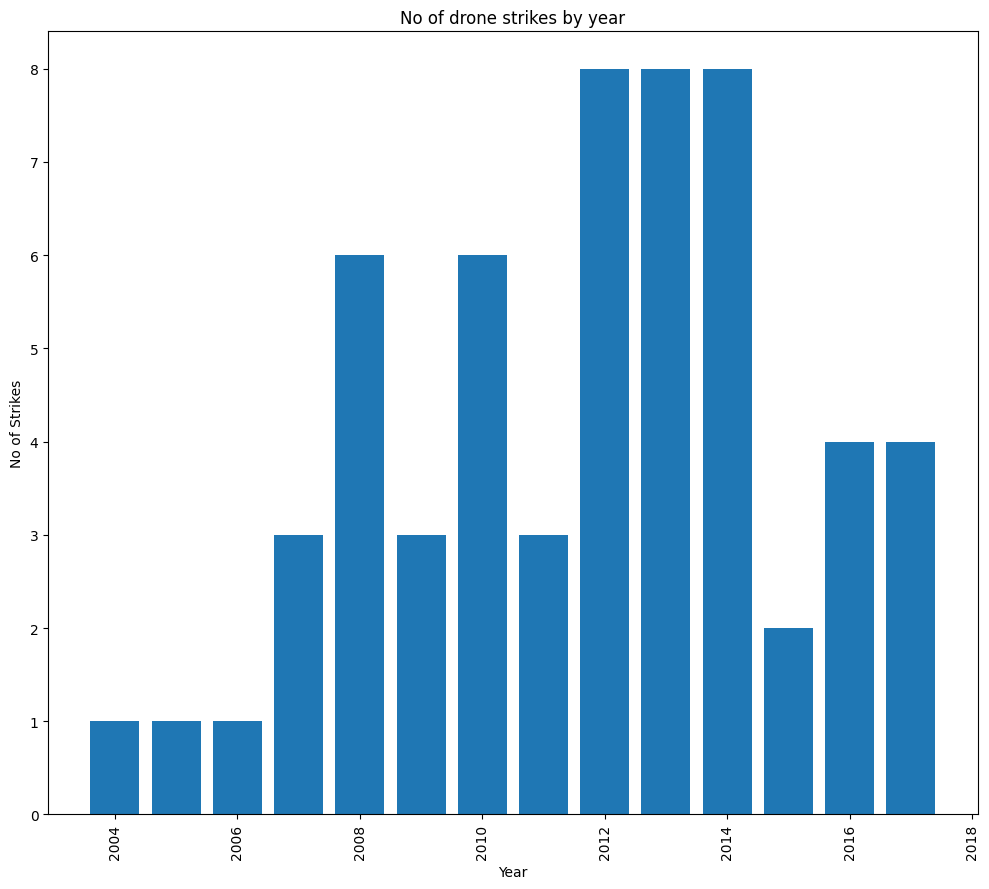

In [9]:
#df2 = sorted_values(by='Year', ascending=False)
plt.figure(figsize = (10,9))
plt.bar(df['Year'], df['No of Strikes'])
plt.xlabel('Year')
plt.ylabel('No of Strikes')
plt.title('No of drone strikes by year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

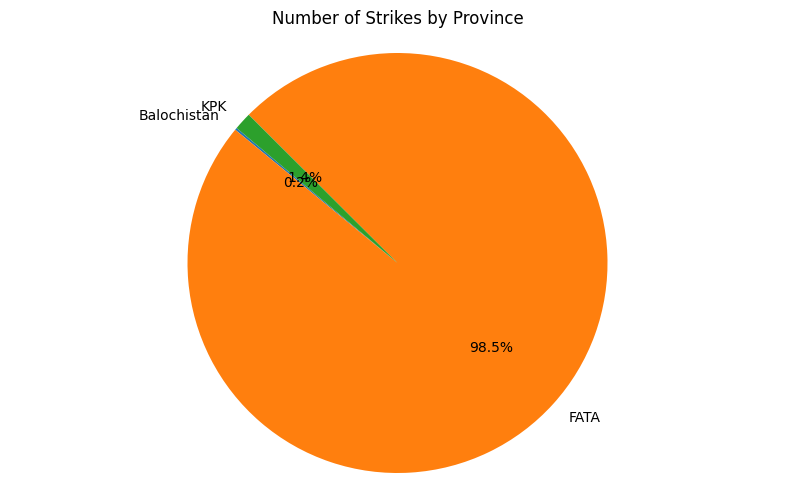

In [10]:
province = df.groupby('Province')['No of Strikes'].sum()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.pie(province, labels=province.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Strikes by Province')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

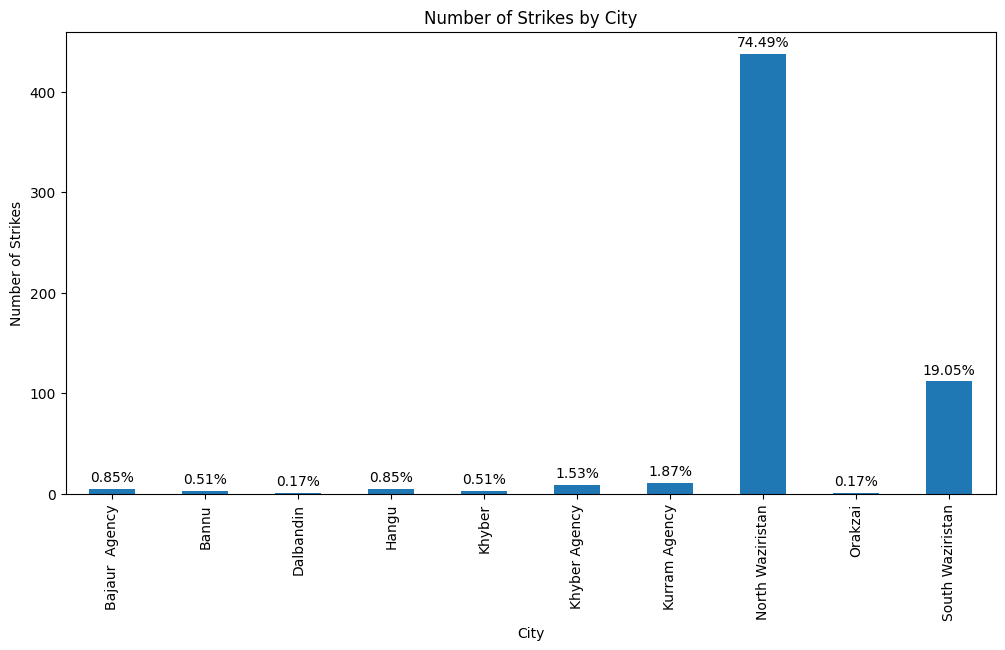

In [11]:
city_strikes = df.groupby('City')['No of Strikes'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = city_strikes.plot(kind='bar')
plt.title('Number of Strikes by City')
plt.xlabel('City')
plt.ylabel('Number of Strikes')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Add percentage labels to the top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height / city_strikes.sum() * 100:.2f}%',  # Calculate and format the percentage
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label
                 xytext=(0, 3),  # Offset label slightly above the bar
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display the bar chart
plt.show()